# ESTUDO DE CASO: CHURN MODELING PARA CLIENTES DE UM BANCO

## Por: Msc. Eng. Lucas Travi

## Curso: Machine Learning para Data Science - UFSM

## DESCRIÇÃO DO PROBLEMA
Adquirir novos clientes pode ser muito mais difícil do que manter os clientes que já temos. Além de manter os clientes que já temos, criar um Churn Model também poderá nos ajudar na aquisição de novos clientes, entendendo melhor o nosso público alvo e pessoas que se interessam pelos nossos serviços.
A taxa de saída/rotatividade (churn rate) de clientes pode ser medida para um determinado período de tempo, como sendo a quantidade de clientes que ficaram após esse tempo e a quantidade inicial de clientes, variando entre 0 e 1.
A churn rate pode estar associada a diversos parâmetros e nem sempre a correlação entre eles fica evidente. Neste projeto criaremos um Churn Model para um banco utilizando uma rede neural artificial e comparando com classificadores de máquina de suporte vetorial e floresta aleatória.

Atributos do dataset:
    - ID;
    - Score de Crédito;
    - País;
    - Gênero;
    - Idade;
    - Tempo que possui conta (em anos);
    - Balanço;
    - Nº de produtos;
    - Tem cartão de crédito (sim ou não);
    - É um membro ativo (sim ou não);
    - Salário Estimado;
    - Deixou de ser cliente (sim ou não)
    
Mais sobre Churn Model: https://www.datascience.com/blog/what-is-a-churn-analysis-and-why-is-it-valuable-for-business

In [1]:
# Importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Importar o dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.drop(dataset.columns[[0, 1, 2]], axis=1, inplace=True)

In [3]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
print('Quantidade de clientes:',dataset.shape[0])

Quantidade de clientes: 10000


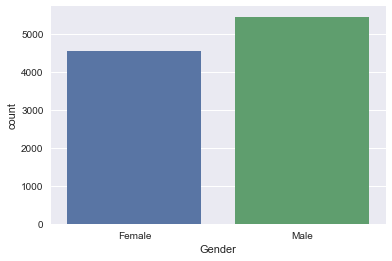

In [7]:
sns.countplot(dataset['Gender'])

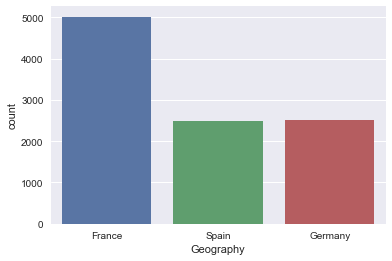

In [8]:
sns.countplot(dataset['Geography'])

A quantidade de clientes do sexo masculino e feminino analisados é similar, no entanto, a quantidade de clientes na França equivalem a metade do total de clientes analisados (10 mil), enquanto França e Espanha dividem o restante. 

In [9]:
X = dataset.iloc[:, 0:10].values
y = dataset.iloc[:, 10].values

In [10]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [11]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

## ANALISANDO OS DADOS

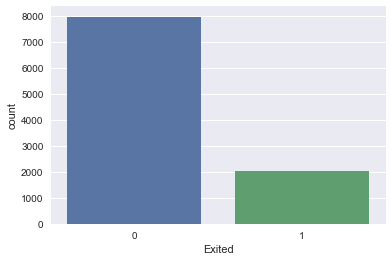

In [12]:
# Distribuição de clientes que deixaram ou não o banco
sns.countplot(dataset['Exited'])

Temos 8 mil clientes que permanceram e 2 mil clientes que saíram do banco no período de tempo analisado. Nossa Churn Rate foi de 20%.

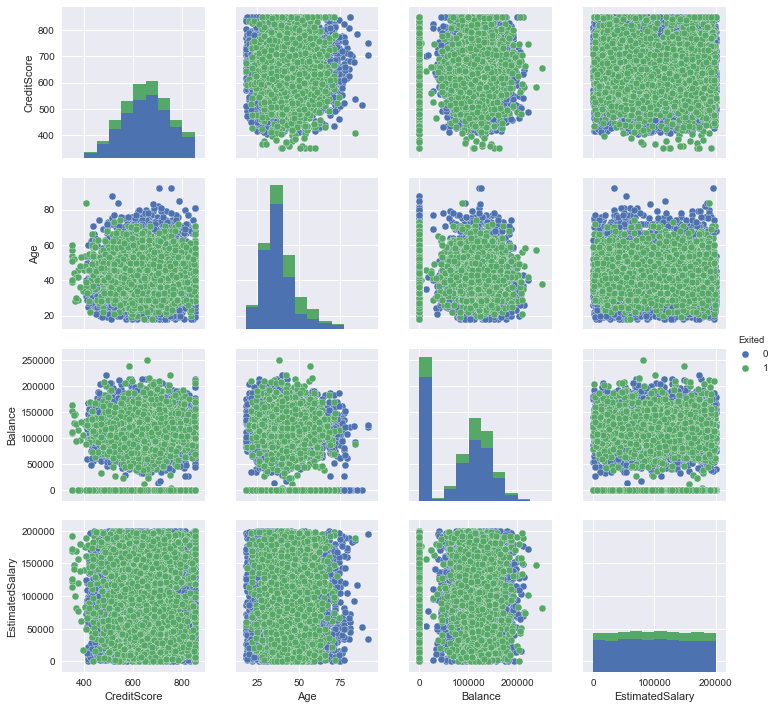

In [13]:
# Correlograma entre alguns atributos numéricos
sns.pairplot(dataset, diag_kind="hist",  hue = 'Exited', vars = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary'])

As variáveis não apresentaram nenhuma clara correlação ou linearidade entre as variáveis numéricas escolhidas.

In [ ]:
# Correlação entre as variáveis
corr_matrix=dataset.corr()
corr_matrix

In [ ]:
# Mapa de Calor com as correlações
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(14,14))
    sns.heatmap(corr_matrix, mask=mask, square=True, annot=True)

O mapa de calor confirma a baixa correlação entre as variáveis. As maiores correlações são entre a quantidade de produtos e o balanço e entre a idade e a variável dependente, que indica se o cliente deixou ou não o banco.
Os atributos deste dataset são difíceis de se relacionar e o fato dele possuir diversos atributos comportamentais/classificatórios e as variáveis terem unidades de medida e grandeza muito diferentes dificultam bastante o trabalho de correlação das variáveis.

Devido a complexidade deste modelo será treinado utilizando redes neurais artificiais (ANN), máquinas de suporte vetorial (SVC) e florestas aleatórias. Depois disso o melhor modelo será analisado mais a fundo e otimizado.

## TREINANDO A REDE NEURAL E CRIANDO O MODELO

In [ ]:
# Codificando a variável geográfica
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:,1] = labelencoder_X_1.fit_transform(X[:, 1])
X

In [ ]:
# Codificando a variável de gênero
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
X

In [ ]:
# Obtendo dummy variables para a variável geográfica
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X

In [ ]:
# Evitando a dummy variable trap
X = X[:, 1:]
X

In [ ]:
# Dividindo os dados observáveis entre treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Padronizando a escala das variáveis independentes
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_test

In [ ]:
# Importando as bibliotecas necessárias para criar a ANN
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Inicializar a ANN
classifier = Sequential()

In [ ]:
# Adicionando a primeira hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

In [ ]:
# Adicionando a segunda hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [ ]:
# Adicionando a output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
# Compilando a ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Treinando a ANN
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

In [ ]:
# Fazendo as previsões com o modelo
y_pred = classifier.predict(X_test)
# Retornar True se y_pred > 0.5
y_pred = (y_pred > 0.5)
y_pred

In [ ]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

1679 previsões foram feitas corretamente pelo modelo para 2000 clientes

In [ ]:
print(classification_report(y_test,y_pred))

Todavia, as métricas demonstram uma dificuldade do modelo em prever corretamente os clientes que irão deixar o banco. Tivemos 276 previsões erradas de clientes que deixariam o banco.

## ANALISANDO O MODELO PARA UM CLIENTE

In [ ]:
# Analisando o modelo para um cliente específico
"""Prever se o cliente irá ficar ou sair do banco baseado nas suas informações:
País: França
Score de Crédito: 600
Gênro: Male
Idade: 40
Tempo que possui conta: 3
Balanço: 60000
Número de Produtos: 2
Tem Cartão de Crédito: Sim
É Membro Ativo: Sim
Salário Estimado: 50000"""
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)
new_prediction

O cliente irá permancer no banco!

## COMPARANDO COM OUTROS MÉTODOS DE CLASSIFICAÇÃO

In [ ]:
# Comparando com um classificador de suporte vetorial
from sklearn.svm import SVC
svc_classifier = SVC(random_state=0)
svc_classifier.fit(X_train, y_train)
y_svc = svc_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_svc)
cm

O algoritmo SVC obteve 1727 acertos para 2000 clientes analisados

In [ ]:
print(classification_report(y_test,y_svc))

In [ ]:
# Comparando com o algoritmo de floresta aleatória
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train,y_train)
y_rf = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_rf)
cm

O algoritmo de floresta aleatória preveu corretamente se 1704 deixaram ou não o banco.

In [ ]:
print(classification_report(y_test,y_rf))

A rede neural foi a que apresentou o pior desempenho entre os candidatos. Pode ficar uma dúvida entre qual dos métodos apresentou melhor performance entre SVC e floresta aleatória, pois o score médio das métricas do svc foram superiores.
Como é muito mais fácil prever que o cliente irá permancer no banco do que sair (1595 amostras testadas permanecem no banco, contra 405 que saíram) devemos dar uma atenção especial às métricas obtidas para a saída de clientes do banco:
    - O SVC apresentou uma maior precisão, porém uma revocação menor
    - Ambos os modelos obtiveram o mesmo f-score (0.57)
    - Será feita uma validação cruzada em ambos os classificadores para determinar qual será escolhido
    
Mais sobre as métricas analisadas:

https://en.wikipedia.org/wiki/Precision_and_recall

https://en.wikipedia.org/wiki/F1_score

## CROSS-VALIDATION

In [ ]:
# Importar o método de validação cruzada para que o modelo seja treinado 10 vezes seguidas por conjuntos de dados diferentes
from sklearn.model_selection import cross_val_score
scores_svc = cross_val_score(svc_classifier, X_train, y_train, cv=10, scoring='recall')
scores_svc

In [ ]:
print("Revocação para clientes que deixaram o banco: %0.2f (+/- %0.2f)" % (scores_svc.mean(), scores_svc.std() * 2))

In [ ]:
scores_rf = cross_val_score(rf_classifier, X_train, y_train, cv=10, scoring='recall')
scores_rf

In [ ]:
print("Revocação para clientes que deixaram o banco: %0.2f (+/- %0.2f)" % (scores_rf.mean(), scores_rf.std() * 2))

O modelo criado com floresta aleatória apresentou uma revocação superior ao utilizarmos o método de validação cruzada para analisar a perfomance dos modelos.
Como o modelo de árvores aleatórias não apresenta uma grande complexidade de ajuste dos parâmetros, o modelo testado buscando otimizar a performance na revocação de clientes que deixaram o banco será o SVC.

## OTIMIZAÇÃO DO MODELO

In [ ]:
# Definir um dicionário com os parâmetros a serem testados
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'sigmoid']}
param_grid

In [ ]:
# Importar GridSearch e realizar a busca dos melhores parâmetros
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid, refit=True,verbose=4, scoring='recall')
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
# Fazer as previsões usando os parâmetros ótimos
grid_predictions = grid.predict(X_test)
cm = confusion_matrix(y_test, grid_predictions)
cm

In [ ]:
print(classification_report(y_test,grid_predictions))

In [ ]:
# Fazer validação cruzada com os parâmetros ótimos
svc_classifier_opt = SVC(random_state=0, C=100, kernel='rbf', gamma=0.1)
svc_classifier_opt.fit(X_train, y_train)
scores_svc_opt = cross_val_score(svc_classifier_opt, X_train, y_train, cv=10, scoring='recall')
scores_svc_opt

In [ ]:
print("Revocação para clientes que deixaram o banco: %0.2f (+/- %0.2f)" % (scores_svc_opt.mean(), scores_svc_opt.std() * 2))

## CONCLUSÃO

O classificador SVC não havia obtido a maior quantidade de acerto referente a clientes que deixaram o banco quando comparado com o classificador de floresta aleatória. No entanto, a otimização dos parâmetros visando melhorar a revocação e o f1-score para a situação na qual o cliente deixa o banco fez com que o classificador SVC otimizado obtivesse resultados melhores que o classificador criado com o algoritmo de floresta aleatória.
No fim, conseguimos um incremento na sensibilidade do modelo para determinar clientes que deixaram o banco. Pelo fato de termos muito menos clientes que deixaram o banco do que os que permanceram, criar um modelo com melhor capacidade de prever a perde de clientes foi a nossa prioridade na sua otimização.